In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 df = pd.read_csv("store20112015.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,01-01-2011,05-01-2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [7]:
df.rename(columns = {'Market':'Marcket','Sub-Category':'Sub_Cat'}, inplace=True)

In [8]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Marcket', 'Region', 'Product_ID', 'Category', 'Sub_Cat',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'Order_Priority'],
      dtype='object')

In [9]:
columns = df.columns

In [10]:
df.duplicated(columns).sum()

0

In [11]:
df.shape

(51290, 24)

In [12]:
df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [13]:
# Row_ID

In [14]:
df.Row_ID.nunique()

51290

In [15]:
for a in df["Row_ID"]:
    if(a%1 != 0):
        print (a)

In [16]:
# Order_ID

In [17]:
df.Order_ID.isnull().sum()

0

In [18]:
df['test'] = df['Order_ID'].str[:8]

In [19]:
df.test

0        AG-2011-
1        IN-2011-
2        HU-2011-
3        IT-2011-
4        IN-2011-
           ...   
51285    CA-2014-
51286    MO-2014-
51287    MX-2014-
51288    MX-2014-
51289    CA-2014-
Name: test, Length: 51290, dtype: object

In [20]:
import re
rex = re.compile("^[A-Z]{2}-[0-9]{4}-$")
for a in df["test"]:
    if rex.match(a) is None:
        print("True")

In [21]:
df.drop(["test"],inplace=True,axis=1)

In [22]:
# Order Date

In [23]:
df.Order_Date.isnull().sum()

0

In [24]:
df.Order_Date

0        01-01-2011
1        01-01-2011
2        01-01-2011
3        01-01-2011
4        01-01-2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: Order_Date, Length: 51290, dtype: object

In [25]:
df.Order_Date=pd.to_datetime(df.Order_Date,format='%d-%m-%Y')

In [26]:
df.Order_Date

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: Order_Date, Length: 51290, dtype: datetime64[ns]

In [27]:
# Ship Date

In [28]:
df.Ship_Date.isnull().sum()

0

In [29]:
df.Ship_Date

0        06-01-2011
1        08-01-2011
2        05-01-2011
3        05-01-2011
4        08-01-2011
            ...    
51285    04-01-2015
51286    05-01-2015
51287    02-01-2015
51288    06-01-2015
51289    04-01-2015
Name: Ship_Date, Length: 51290, dtype: object

In [30]:
df.Ship_Date=pd.to_datetime(df.Ship_Date,format='%d-%m-%Y')

In [31]:
df.Ship_Date

0       2011-01-06
1       2011-01-08
2       2011-01-05
3       2011-01-05
4       2011-01-08
           ...    
51285   2015-01-04
51286   2015-01-05
51287   2015-01-02
51288   2015-01-06
51289   2015-01-04
Name: Ship_Date, Length: 51290, dtype: datetime64[ns]

In [32]:
# Ship Mode

In [33]:
df.Ship_Mode.nunique()

4

In [34]:
df.Ship_Mode.value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship_Mode, dtype: int64

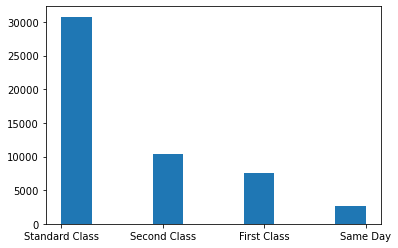

In [35]:
plt.hist(df.Ship_Mode)
plt.show()

In [36]:
# Customer_ID

In [37]:
df['test'] = df['Order_ID'].str[:3]

In [38]:
df.test

0        AG-
1        IN-
2        HU-
3        IT-
4        IN-
        ... 
51285    CA-
51286    MO-
51287    MX-
51288    MX-
51289    CA-
Name: test, Length: 51290, dtype: object

In [39]:
import re
rex = re.compile("^[A-Z]{2}-$")
for a in df["test"]:
    if rex.match(a) is None:
        print("True")

In [40]:
df.drop(["test"],inplace=True,axis=1)

In [41]:
# Customer Name

In [42]:
df.Customer_Name.isnull().sum()

0

In [43]:
df.duplicated(["Customer_Name"]).sum()

50495

In [44]:
df.Customer_Name.nunique()

795

In [45]:
df.Customer_Name.value_counts()

Muhammed Yedwab        108
Steven Ward            106
Bill Eplett            102
Patrick O'Brill        102
Gary Hwang             102
                      ... 
Catherine Glotzbach     35
David Bremer            34
Nicole Brennan          31
Darren Budd             31
Michael Oakman          29
Name: Customer_Name, Length: 795, dtype: int64

In [46]:
# Segment

In [47]:
df.Segment.nunique()

3

In [48]:
df.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [49]:
# City & State & Country

In [50]:
df.City.nunique()

3636

In [51]:
df.State.nunique()

1094

In [52]:
df.Country.nunique()

147

In [53]:
df["test"] = df.City + df.State

In [54]:
df.test.nunique()

3812

In [55]:
df['test1'] = df.State + df.Country

In [56]:
df.test1.nunique()

1119

In [57]:
df["test2"] = df.City + df.Country

In [58]:
df.test2.nunique()

3703

In [59]:
df.drop(['test','test1','test2'],inplace=True,axis=1)

In [60]:
# In an ideal situation, test and test2 should give 3636 unique combinations
# test1 should give 1094 unique combinations

In [61]:
df.City.isnull().sum()

0

In [62]:
df.Country.isnull().sum()

0

In [63]:
# Postal code

In [64]:
df.Postal_Code.isnull().sum()

41296

In [65]:
41296/51290

0.8051472021836615

In [66]:
# We won't need this column

In [67]:
df.drop(["Postal_Code"],inplace=True,axis=1)

In [68]:
# Market

In [69]:
df.Marcket.nunique()

7

In [70]:
df.Marcket.value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Marcket, dtype: int64

In [71]:
# Region

In [72]:
df.Region.nunique()

13

In [73]:
df.Region.value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [74]:
# Product ID

In [75]:
df.Product_ID.nunique()

10292

In [76]:
rex = re.compile("^[A-Z]{3}-[A-Z]{3}-[0-9]{8}$")
rex1 = re.compile("^[A-Z]{3}-[A-Z]{2}-[0-9]{8}$")
for a in df["Product_ID"]:
    if rex.match(a) is None:
        if rex1.match(a) is None:
            print(a)

TEC-HP -10003618
TEC-HP -10001577
TEC-HP -10004012
TEC-HP -10000464
TEC-HP -10004590
TEC-HP -10003248
TEC-HP -10004971
TEC-HP -10003248
TEC-HP -10003618
TEC-HP -10004451
TEC-HP -10002603
TEC-HP -10004082
TEC-HP -10003894
TEC-HP -10003894
TEC-HP -10003618
TEC-HP -10001577
TEC-HP -10002095
TEC-HP -10000464
TEC-HP -10002307
TEC-HP -10003618
TEC-HP -10004012
TEC-HP -10001905
TEC-HP -10004012
TEC-HP -10004590
TEC-HP -10003894
TEC-HP -10004149
TEC-HP -10000081
TEC-HP -10002221
TEC-HP -10002221
TEC-HP -10001426
TEC-HP -10003248
TEC-HP -10004590
TEC-HP -10004451
TEC-HP -10004149
TEC-HP -10002221
TEC-HP -10001574
TEC-HP -10000081
TEC-HP -10000464
TEC-HP -10004801
TEC-HP -10002095
TEC-HP -10004801
TEC-HP -10001426
TEC-HP -10002307
TEC-HP -10002603
TEC-HP -10003248
TEC-HP -10001426
TEC-HP -10000081
TEC-HP -10002221
TEC-HP -10001574
TEC-HP -10001577
TEC-HP -10004801
TEC-HP -10000464
TEC-HP -10004149
TEC-HP -10004801
TEC-HP -10004590
TEC-HP -10003345
TEC-HP -10004082
TEC-HP -10002095
TEC-HP -100035

In [77]:
df.Product_ID = df.Product_ID.str.replace(' ', '')

In [78]:
rex = re.compile("^[A-Z]{3}-[A-Z]{3}-[0-9]{8}$")
rex1 = re.compile("^[A-Z]{3}-[A-Z]{2}-[0-9]{8}$")
for a in df["Product_ID"]:
    if rex.match(a) is None:
        if rex1.match(a) is None:
            print(a)

In [79]:
# Category

In [80]:
df.Category.nunique()

3

In [81]:
df.Category.value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [82]:
# Sub-Category

In [83]:
df.Sub_Cat.nunique()

17

In [84]:
df.Sub_Cat.value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub_Cat, dtype: int64

In [85]:
df['test'] = df.Category + df.Sub_Cat

In [86]:
df.test.nunique()

17

In [87]:
df.drop(['test'],inplace=True,axis=1)

In [88]:
# Product Name

In [89]:
df.Product_Name.isnull().sum()

0

In [90]:
# Order Priority

In [91]:
df.Order_Priority.nunique()

4

In [92]:
df.Order_Priority.value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order_Priority, dtype: int64

In [93]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print (lower_range,upper_range)
    plt.hist(datacolumn)
    plt.show()

In [94]:
# Sales Quantity Discount Profit Shipping Cost

-299.6832375 581.4950625


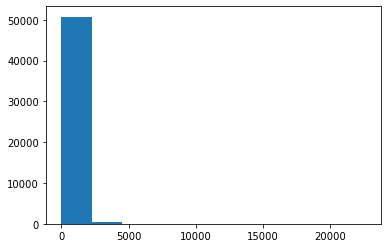

In [95]:
outlier(df.Sales)

In [96]:
df[df.Sales > 582]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub_Cat,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
24,13130,ES-2011-1705541,2011-03-01,2011-03-06,Standard Class,TS-21370,Todd Sumrall,Corporate,Farnborough,England,...,FUR-BO-10000259,Furniture,Bookcases,"Safco Classic Bookcase, Traditional",1314.4500,3,0.00,341.7300,150.40,High
25,48599,UP-2011-3730,2011-03-01,2011-03-05,Standard Class,RD-9900,Ruben Dartt,Consumer,Vinnytsya,Vinnytsya,...,TEC-LOG-10003896,Technology,Accessories,"Logitech Router, Erganomic",1470.7800,6,0.00,264.6000,146.55,Medium
27,37844,CA-2011-113880,2011-03-01,2011-03-05,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,Illinois,...,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.1160,6,0.30,-172.1172,70.05,High
29,13131,ES-2011-1705541,2011-03-01,2011-03-06,Standard Class,TS-21370,Todd Sumrall,Corporate,Farnborough,England,...,FUR-CH-10002830,Furniture,Chairs,"Office Star Rocking Chair, Red",704.5500,5,0.00,288.7500,64.40,High
30,48593,UP-2011-3730,2011-03-01,2011-03-05,Standard Class,RD-9900,Ruben Dartt,Consumer,Vinnytsya,Vinnytsya,...,OFF-FEL-10002867,Office Supplies,Storage,"Fellowes Lockers, Single Width",1244.1600,6,0.00,211.5000,60.78,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51229,26535,IN-2014-43550,2014-12-31,2015-01-01,First Class,ML-17395,Marina Lichtenstein,Corporate,Jakarta,Jakarta,...,FUR-BO-10004679,Furniture,Bookcases,"Safco Library with Doors, Pine",1091.2806,3,0.07,46.9206,243.11,High
51230,44025,RS-2014-1460,2014-12-31,2015-01-02,Second Class,PB-9105,Peter Bühler,Consumer,Ufa,Bashkortostan,...,TEC-HEW-10004652,Technology,Copiers,"Hewlett Personal Copier, Laser",865.6200,6,0.00,51.8400,138.18,High
51231,26333,IN-2014-30390,2014-12-31,2015-01-03,First Class,JD-16150,Justin Deggeller,Corporate,Bangkok,Bangkok,...,FUR-TA-10001531,Furniture,Tables,"Lesro Training Table, Adjustable Height",1048.7313,9,0.57,-1195.2387,86.86,High
51232,12929,ES-2014-3458802,2014-12-31,2015-01-05,Standard Class,JG-15805,John Grady,Corporate,Maidenhead,England,...,TEC-PH-10003683,Technology,Phones,"Motorola Audio Dock, VoIP",867.3000,5,0.00,251.4000,53.16,Medium


-2.5 9.5


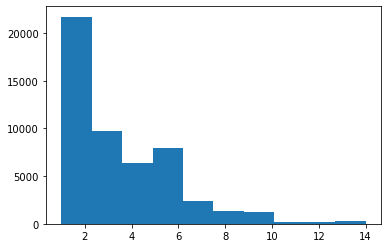

In [97]:
outlier(df.Quantity)

In [99]:
df[df.Quantity>9.5]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub_Cat,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
61,12529,ES-2011-1416586,2011-03-01,2011-03-04,Second Class,EL-13735,Ed Ludwig,Home Office,Bochum,North Rhine-Westphalia,...,OFF-AR-10000505,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",146.520,12,0.0,0.000,3.35,Medium
106,16113,ES-2011-5940123,2011-06-01,2011-06-04,Second Class,MC-18130,Mike Caudle,Corporate,Warrington,England,...,TEC-AC-10000140,Technology,Accessories,"Enermax Numeric Keypad, Bluetooth",805.560,14,0.0,185.220,80.12,Medium
144,2107,MX-2011-126641,2011-07-01,2011-07-03,First Class,FW-14395,Fred Wasserman,Corporate,Antiguo Cuscatlán,La Libertad,...,OFF-AR-10000019,Office Supplies,Art,"BIC Highlighters, Blue",138.820,11,0.0,56.760,30.89,Critical
235,48321,SA-2011-1130,2011-11-01,2011-11-02,First Class,HR-4770,Hallie Redmond,Home Office,Jeddah,Makkah,...,OFF-STA-10000298,Office Supplies,Art,"Stanley Canvas, Blue",593.640,12,0.0,94.680,67.09,Medium
236,17719,ES-2011-4915337,2011-11-01,2011-11-06,Standard Class,JG-15115,Jack Garza,Consumer,Messina,Sicily,...,OFF-ST-10000624,Office Supplies,Storage,"Eldon File Cart, Single Width",770.220,10,0.4,38.220,63.67,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51024,33008,CA-2014-123491,2014-10-31,2014-11-06,Standard Class,JK-15205,Jamie Kunitz,Consumer,San Francisco,California,...,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",1702.120,14,0.0,510.636,107.69,Medium
51028,3312,US-2014-127026,2014-10-31,2014-11-04,Standard Class,NS-18505,Neola Schneider,Consumer,Monterrey,Nuevo León,...,FUR-FU-10004339,Furniture,Furnishings,"Deflect-O Frame, Black",484.176,11,0.4,-137.324,73.41,High
51125,33621,CA-2012-109470,2012-12-31,2013-01-03,Second Class,KC-16255,Karen Carlisle,Corporate,Henderson,Kentucky,...,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,364.800,12,0.0,167.808,28.17,High
51180,25710,IN-2013-52972,2013-12-31,2014-01-04,Standard Class,BD-11620,Brian DeCherney,Consumer,Malegaon,Maharashtra,...,OFF-PA-10001258,Office Supplies,Paper,"Green Bar Cards & Envelopes, Multicolor",498.000,10,0.0,44.700,41.18,Medium


-0.30000000000000004 0.5


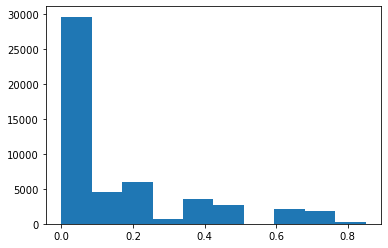

In [100]:
outlier(df.Discount)

In [104]:
df[df.Discount>0.5]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub_Cat,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
53,39246,CA-2011-131009,2011-03-01,2011-03-05,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,...,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.5520,6,0.60,-34.9536,7.38,Medium
74,50129,NI-2011-190,2011-03-01,2011-03-06,Standard Class,EH-3765,Edward Hooks,Corporate,Kano,Kano,...,OFF-HOO-10002386,Office Supplies,Appliances,"Hoover Toaster, Silver",25.3170,1,0.70,-28.7130,0.79,Medium
114,47598,TU-2011-7020,2011-06-01,2011-06-01,Same Day,WB-11850,William Brown,Consumer,Istanbul,Istanbul,...,OFF-FEL-10001865,Office Supplies,Storage,"Fellowes File Cart, Wire Frame",109.1040,2,0.60,-106.4160,17.97,Critical
129,47600,TU-2011-7020,2011-06-01,2011-06-01,Same Day,WB-11850,William Brown,Consumer,Istanbul,Istanbul,...,OFF-WIL-10002233,Office Supplies,Binders,"Wilson Jones Index Tab, Durable",12.7200,4,0.60,-18.4800,3.99,Critical
130,47599,TU-2011-7020,2011-06-01,2011-06-01,Same Day,WB-11850,William Brown,Consumer,Istanbul,Istanbul,...,OFF-KRA-10000492,Office Supplies,Envelopes,"Kraft Manila Envelope, Recycled",10.1160,1,0.60,-10.6440,3.80,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51221,16206,ES-2013-5147891,2013-12-31,2014-01-06,Standard Class,PF-19225,Phillip Flathmann,Consumer,Dresden,Saxony,...,OFF-ST-10000355,Office Supplies,Storage,"Eldon Box, Wire Frame",18.6600,5,0.60,-13.1400,0.96,Medium
51223,42653,TU-2013-9400,2013-12-31,2014-01-04,Standard Class,TM-11490,Tony Molinari,Consumer,Gaziantep,Gaziantep,...,FUR-ELD-10001413,Furniture,Furnishings,"Eldon Light Bulb, Black",10.0800,1,0.60,-5.5500,0.59,Medium
51231,26333,IN-2014-30390,2014-12-31,2015-01-03,First Class,JD-16150,Justin Deggeller,Corporate,Bangkok,Bangkok,...,FUR-TA-10001531,Furniture,Tables,"Lesro Training Table, Adjustable Height",1048.7313,9,0.57,-1195.2387,86.86,High
51249,41744,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,FUR-TEN-10000558,Furniture,Furnishings,"Tenex Frame, Erganomic",173.7600,4,0.60,-117.3600,13.72,Medium


-55.215 92.025


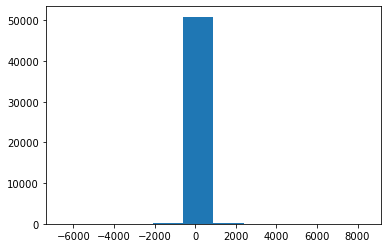

In [101]:
outlier(df.Profit)

In [106]:
df[(df.Profit > 92) | (df.Profit < -55)]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub_Cat,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.140,35.46,Medium
8,44508,AO-2011-1390,2011-02-01,2011-02-04,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.880,53.08,Critical
10,25293,IN-2011-36074,2011-02-01,2011-02-05,Second Class,DK-13150,David Kendrick,Corporate,Chongqing,Chongqing,...,OFF-AP-10001254,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Red",352.350,5,0.00,137.400,33.15,Medium
12,41445,IR-2011-6550,2011-02-01,2011-02-06,Standard Class,PO-8850,Patrick O'Brill,Consumer,Mashhad,Razavi Khorasan,...,FUR-ADV-10002601,Furniture,Furnishings,"Advantus Photo Frame, Erganomic",309.600,6,0.00,148.500,19.65,High
24,13130,ES-2011-1705541,2011-03-01,2011-03-06,Standard Class,TS-21370,Todd Sumrall,Corporate,Farnborough,England,...,FUR-BO-10000259,Furniture,Bookcases,"Safco Classic Bookcase, Traditional",1314.450,3,0.00,341.730,150.40,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51239,28570,ID-2014-54442,2014-12-31,2015-01-04,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Manila,National Capital,...,TEC-CO-10000666,Technology,Copiers,"Hewlett Copy Machine, Laser",684.606,4,0.35,-63.234,42.92,Medium
51245,23680,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",276.600,4,0.00,105.000,21.84,Medium
51249,41744,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,FUR-TEN-10000558,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.60,-117.360,13.72,Medium
51252,42474,OD-2014-9490,2014-12-31,2015-01-05,Standard Class,MW-8235,Mitch Willingham,Corporate,Juba,Central Equatoria,...,TEC-CAN-10004291,Technology,Copiers,"Canon Wireless Fax, Digital",378.300,1,0.00,166.440,11.71,Medium


-30.15 57.209999999999994


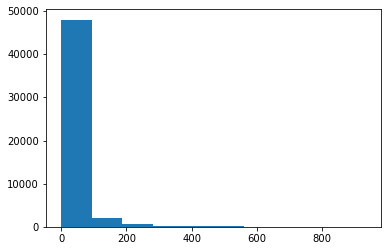

In [103]:
outlier(df.Shipping_Cost)

In [107]:
df[df.Shipping_Cost > 57]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub_Cat,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
6,21613,IN-2011-30733,2011-02-01,2011-02-03,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.7800,2,0.000,71.4000,57.30,Critical
23,44228,CA-2011-1800,2011-03-01,2011-03-04,First Class,TP-11415,Tom Prescott,Consumer,Toronto,Ontario,...,OFF-FEL-10001405,Office Supplies,Storage,"Fellowes File Cart, Industrial",551.1600,4,0.000,71.6400,164.36,High
24,13130,ES-2011-1705541,2011-03-01,2011-03-06,Standard Class,TS-21370,Todd Sumrall,Corporate,Farnborough,England,...,FUR-BO-10000259,Furniture,Bookcases,"Safco Classic Bookcase, Traditional",1314.4500,3,0.000,341.7300,150.40,High
25,48599,UP-2011-3730,2011-03-01,2011-03-05,Standard Class,RD-9900,Ruben Dartt,Consumer,Vinnytsya,Vinnytsya,...,TEC-LOG-10003896,Technology,Accessories,"Logitech Router, Erganomic",1470.7800,6,0.000,264.6000,146.55,Medium
26,15218,ES-2011-3893444,2011-03-01,2011-03-05,Standard Class,TB-21400,Tom Boeckenhauer,Consumer,Berlin,Berlin,...,OFF-AP-10002568,Office Supplies,Appliances,"Hamilton Beach Toaster, Black",364.4160,8,0.200,45.4560,80.67,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51175,16234,ES-2013-5731775,2013-12-31,2014-01-07,Standard Class,GM-14455,Gary Mitchum,Home Office,Redditch,England,...,TEC-MA-10002264,Technology,Machines,"Panasonic Printer, Durable",799.8300,3,0.000,167.9400,57.73,Low
51228,1783,MX-2014-116267,2014-12-31,2015-01-03,Second Class,EB-13975,Erica Bern,Corporate,São Paulo,São Paulo,...,TEC-CO-10000137,Technology,Copiers,"Canon Wireless Fax, Color",1264.4660,5,0.002,301.4660,253.25,High
51229,26535,IN-2014-43550,2014-12-31,2015-01-01,First Class,ML-17395,Marina Lichtenstein,Corporate,Jakarta,Jakarta,...,FUR-BO-10004679,Furniture,Bookcases,"Safco Library with Doors, Pine",1091.2806,3,0.070,46.9206,243.11,High
51230,44025,RS-2014-1460,2014-12-31,2015-01-02,Second Class,PB-9105,Peter Bühler,Consumer,Ufa,Bashkortostan,...,TEC-HEW-10004652,Technology,Copiers,"Hewlett Personal Copier, Laser",865.6200,6,0.000,51.8400,138.18,High
